The aim of this project is to explore a data set created by FiveThirtyEight besed off a survey sent out by them to their content consumers regarding the consumers thoughs on the Star Wars Franchise.

As there are certain characters in the dataset that are not compatable with panda's default utf-8 encoding, the ISO-8859-1 encoding has to be stated.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Lets have a look at the dataframe

In [2]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In the above dataframe we can see that initialy the data takes up 1187 rows and 38 columns. 

Each row is a respondent (some of which have IDs of NaN)

Information in the columns contains:
- Details abot the respondent such as gender, age and so forth
- Questions about their interactions with the Star Wars franchise such as which of the movies they have watched
- Answers to trivia questions about Star Wars

The repondent ID for the respondent in row 1 is NaN. This is an invalid value and makes the entire row invalid. Thus let's investigate whether there are any more rows witha respondent ID of NaN.

In [3]:
pd.notnull(star_wars["RespondentID"]).value_counts()

True     1186
False       1
Name: RespondentID, dtype: int64

Thus we can see that it is only the first row that is not valid. Let's remove this row.

In [4]:
star_wars = star_wars.loc[pd.notnull(star_wars["RespondentID"])]

We can also convert the values from the next to columns "Have you seen any of the 6 films in the Star Wars franchise?" and "Do you consider yourself to be a fan of the Star Wars film franchise?" to True and False values to make them easier to work with.

In [5]:
yes_no = {
    "Yes":True,
    "No":False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

star_wars.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


It can be seen that some of the column headings need to be cleaned as well as the data in these columns. For example Unnamed: 4, Unnamed: 5, etc obviously refer to movies as the column data consists of either a NaN value or the name of the particular movie. In this case we can change the column name to the movie name and change the cell values to either a 1 or zero based on whether the person selected that they have seen the movie or not.

Let's first change the column names

In [6]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_ep1",
    "Unnamed: 4":"seen_ep2",
    "Unnamed: 5":"seen_ep3",
    "Unnamed: 6":"seen_ep4",
    "Unnamed: 7":"seen_ep5",
    "Unnamed: 8":"seen_ep6"
    
})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now let's change the cell data in these columns to Boolean values

In [7]:
import numpy as np

ep_dict = {
    np.nan:False
}

ep_dict_2 = {
    False:False,
    np.nan:True
}

for ep in ["seen_ep1","seen_ep2","seen_ep3","seen_ep4","seen_ep5","seen_ep6"]:
    star_wars[ep] = star_wars[ep].map(ep_dict)
    star_wars[ep] = star_wars[ep].map(ep_dict_2)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Now let's have a look at some of the columns further to the right.

In [8]:
star_wars.iloc[:,9:]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,6,5,4,3,1,2,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,4,5,6,3,2,1,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,5,4,6,2,1,3,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,1,2,3,4,5,6,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


The next 6 columns seem to be asking fans to rate the films in order of perference with each column representing a film and the corresponsing cell value representing the film's ranking from 1 to 6 with 1 being 1st and 6 being last. Let's rename these columns and check if the cells values are the numeric type or if they need to be converted.

In [9]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"rank_ep1",
    "Unnamed: 10":"rank_ep2",
    "Unnamed: 11":"rank_ep3",
    "Unnamed: 12":"rank_ep4",
    "Unnamed: 13":"rank_ep5",
    "Unnamed: 14":"rank_ep6"
})

star_wars.iloc[:,9:]

,rank_ep1,rank_ep2,rank_ep3,rank_ep4,rank_ep5,rank_ep6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,6,5,4,3,1,2,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,4,5,6,3,2,1,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,5,4,6,2,1,3,Very favorably,Somewhat unfavorably,Somewhat favorably,Somewhat favorably,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,1,2,3,4,5,6,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In [10]:
star_wars["rank_ep1"].dtypes

dtype('O')

Thus as this column is 'Object' type, we need to convert to numeric.

In [11]:
for ep in ["rank_ep1","rank_ep2","rank_ep3","rank_ep4","rank_ep5","rank_ep6"]:
    star_wars[ep] = pd.to_numeric(star_wars[ep],errors="coerce")

star_wars["rank_ep1"].dtypes

dtype('float64')

In [12]:
star_wars.iloc[:,9:15]

,rank_ep1,rank_ep2,rank_ep3,rank_ep4,rank_ep5,rank_ep6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


Now that we have cleaned up the ranking columns, let's have a look at the average rank for each movie.

In [13]:
ranking_means = star_wars.iloc[:,9:15].mean()

Let's plot this so that we can visualise it better.

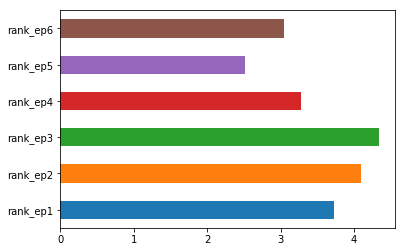

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline
ranking_means.plot(kind="barh")

As the lower numbers are better (1st is better than 6th) we can see that the ranking from first to last is as follows: 5,6,4,1,2,3.

Thus Star Wars: Episode V The Empire Strikes Back is the best Star Wars move according to this survey.

In order to make sure our rankings are valid, we need to have a look at how many people have seen each of the movies. For example if our top rated movie has only been seen a handfull of times, our rankings will be less valid.

In [15]:
times_seen = star_wars.iloc[:,3:9].sum()

times_seen

seen_ep1    673
seen_ep2    571
seen_ep3    550
seen_ep4    607
seen_ep5    758
seen_ep6    738
dtype: int64

We had a total of 1186 valid responders and so this is the population size. Let's graph the number of times each movie has been seen as a percentage of the total number of valid repondents.

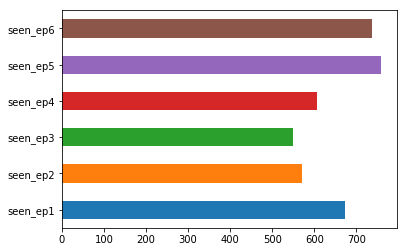

In [16]:
times_seen.plot(kind="barh")

The rankings in terms of which movie was he most seen (from most to least seen) are as follows: 5,6,1,4,2,3

If we look at this compared to the ranking positions (5,6,4,1,2,3) we see that they are exactly the same!

Thus we can accept that the ranking is indeed valid.

Now let's have a look into how certain segments of the population responded.

Lets have a look at the following groups and see if the different groups rated the mocies differently:

- Males
- Females
- Star Trek Fans

Males

In [17]:
ranking_means_male = star_wars.loc[star_wars["Gender"]=="Male"].iloc[:,9:15].mean()

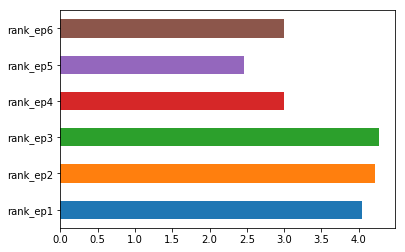

In [18]:
ranking_means_male.plot(kind="barh")

Females

In [19]:
ranking_means_female = star_wars.loc[star_wars["Gender"]=="Female"].iloc[:,9:15].mean()

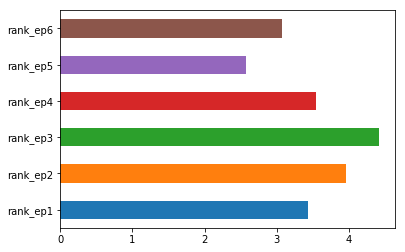

In [20]:
ranking_means_female.plot(kind="barh")

Both males and females agree that the fifth movie is the best and that the third movie is the worst. 

Males rated the 6th and 4th movies and the 2nd and 3rd movies as relativly equal while the females strongly prefered the 6th to the 4th and the 2nd to the 3rd.

Star Trek Fans

In [21]:
ranking_means_trek = star_wars.loc[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=="Yes"].iloc[:,9:15].mean()

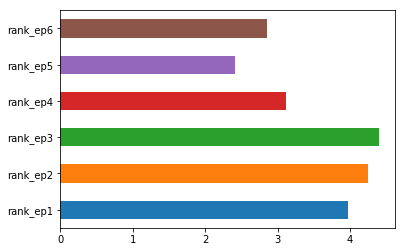

In [22]:
ranking_means_trek.plot(kind="barh")

The ranking graph for the star trek fans is very much like the overall rating graph. 

Let's explore what percentage of respondents are star trek fans.

In [23]:
star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts()

No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

Thus as most of the respondents are not Star Trek fans, we can conclude that it is likely that the fact that someone is a star trek fan does not influence their rankings of the Star Wars movies